For this work we will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

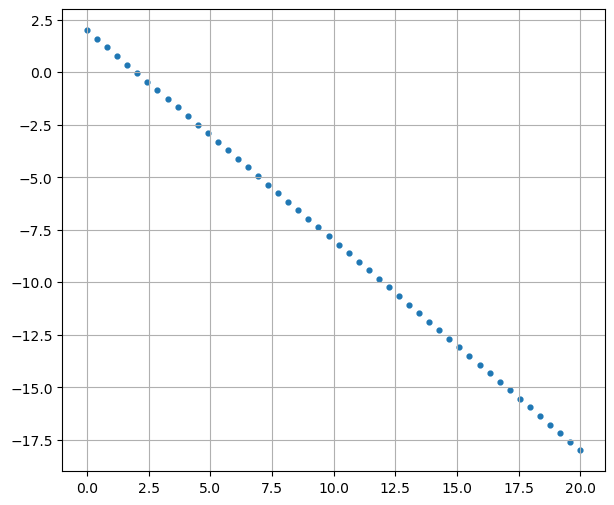

In [6]:
plt.figure(figsize=(7,6))
plt.scatter(X,y,s=12)
plt.grid()
plt.show()

#### Use the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [9]:
def gd_single_var(X, y, alpha, max_iterations):
    X0 = np.ones(shape=(X.shape[0], 1))
    X_vec = np.concatenate([X0, X.reshape(X.shape[0], -1)], axis=1)  # Concatenate bias term
    theta_vec = np.zeros(shape=(X_vec.shape[1], 1))  # Column vector for theta
    theta_0_list = []
    theta_1_list = []
    J_list = []
    h_x_list = []
    theta_0_opt = 0
    theta_1_opt = 0
    epochs = []
    for iter in range(max_iterations):
        epochs.append(iter)
        theta_0_list.append(theta_vec[0,0])
        theta_1_list.append(theta_vec[1,0])
        h_X = X_vec @ theta_vec  # Prediction
        h_x_list.append(h_X)
        e_v = h_X - y.reshape(-1, 1)  #convert y to column vector
        j = (0.5 / len(X)) * (np.linalg.norm(e_v) ** 2)  # Compute cost
        J_list.append(j)  # Store cost values
        gradient_vec = (1 / len(X)) * (X_vec.T @ e_v)  # Compute gradient
        theta_vec = theta_vec - (alpha * gradient_vec)  # Update
        print(f"*************** Iteration {iter} ***************\n\n")
        print("h(x):\n",h_X.reshape(1,-1))
        print("Error Vector:\n", e_v.reshape(1,-1))
        print("\nj =",j)
        print("\nGradient Vector:\n", gradient_vec)
        print("\nGradient Vector Norm:\n",np.linalg.norm(gradient_vec,2))
        print("\ntheta_0_new:",theta_vec[0,0])
        print("theta_1_new:",theta_vec[1,0])
        
        # Check convergence
        if iter > 1:
            if (np.linalg.norm(gradient_vec, 2) < 0.001 or abs(J_list[-1] - J_list[-2]) <0.001):
                theta_0_opt = theta_vec[0,0]
                theta_1_opt = theta_vec[1,0]
                break
    print("*************** Training Report ***************\n\n")
    print(f"Gradient descent converged after {epochs[-1]} epochs")
    print("\ntheta_0_opt:",theta_vec[0,0])
    print("theta_1_opt:",theta_vec[1,0])
    print("Error Vector:\n", e_v.reshape(1,-1))
    print("\nCost =", j)
    print("h(x) = y_predict:\n",h_X.reshape(1,-1))
    print("y_actual:\n",y)
    
    return (epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt)         
    


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [12]:
alpha = 0.0005
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = gd_single_var(X, y, alpha, max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [10]:
def plot_epochs_vs_loss(epochs,J_list,alpha):
    plt.figure(figsize=(7,5))
    plt.plot(epochs,J_list, color='blue', linestyle='-', marker='o')
    plt.title(f"Learning Rate = {alpha}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()
def plot_theta0_vs_loss(theta_0_list,J_list,alpha):
    plt.figure(figsize=(7,5))
    plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
    plt.title(f"Learning Rate = {alpha}")
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

def plot_theta1_vs_loss(theta_1_list,J_list,alpha):
    plt.figure(figsize=(7,5))
    plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
    plt.title(f"Learning Rate = {alpha}")
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

def plot_prediction_lines(X,y,h_x_list): 
    plt.figure(figsize=(7,5))
    plt.scatter(X,y, marker='o', color="blue", s=8)
    for line in h_x_list:
        plt.plot(X,line, color='red', linestyle='-')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.show()

def plot_final_prediction_line(X,y,h_x):
    plt.figure(figsize=(7,5))
    plt.scatter(X,y, marker='o', color="blue", s=8)
    plt.plot(X,h_x, color='red', linestyle='-')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.show()

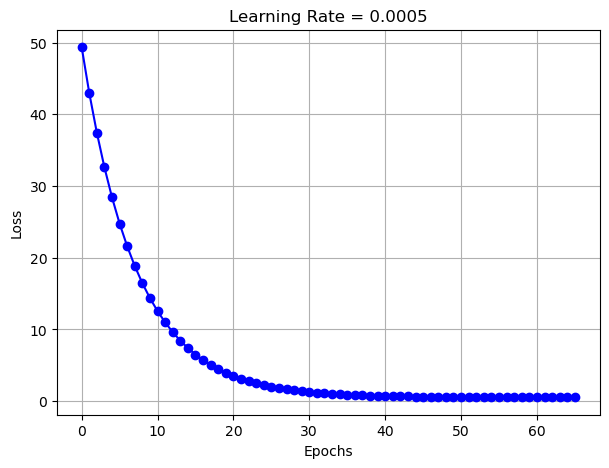

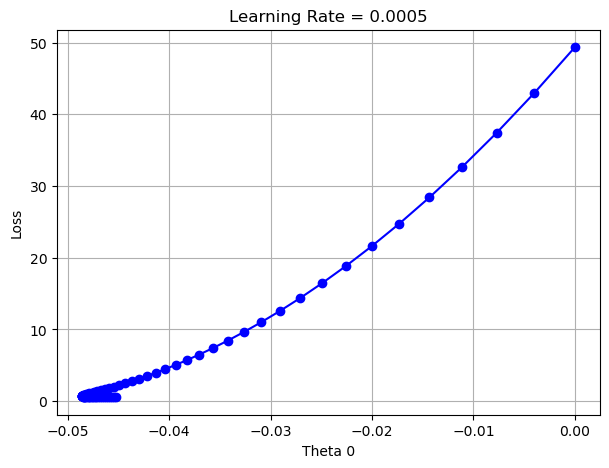

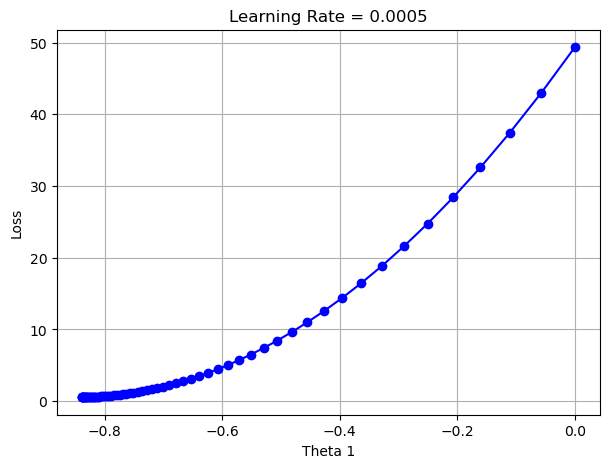

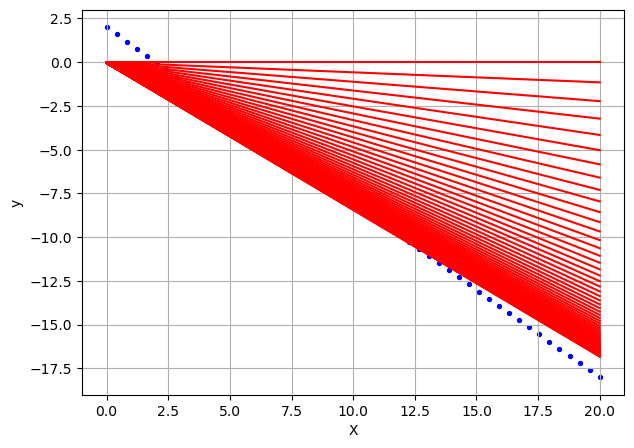

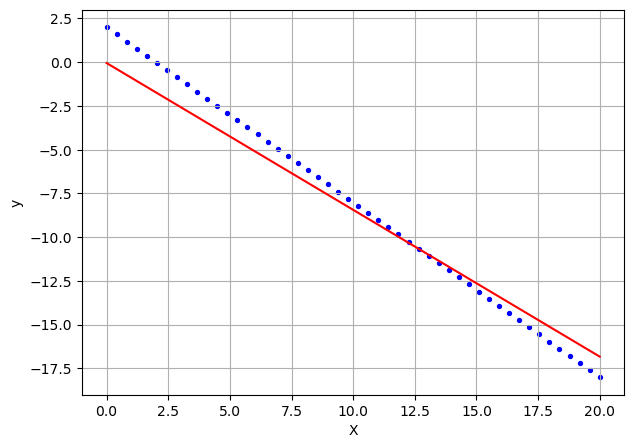

In [16]:
plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [18]:
def Momentum_based_gd_single_var(X, y, alpha, gamma, max_iterations):
    X0 = np.ones(shape=(X.shape[0], 1))
    X_vec = np.concatenate([X0, X.reshape(X.shape[0], -1)], axis=1)  # Concatenate bias term
    theta_vec = np.zeros(shape=(X_vec.shape[1], 1))  # Column vector for theta
    theta_0_list = []
    theta_1_list = []
    J_list = []
    h_x_list = []
    theta_0_opt = 0
    theta_1_opt = 0
    epochs = []
    Vt = 0
    for iter in range(max_iterations):
        epochs.append(iter)
        theta_0_list.append(theta_vec[0,0])
        theta_1_list.append(theta_vec[1,0])
        h_X = X_vec @ theta_vec  # Prediction
        h_x_list.append(h_X)
        e_v = h_X - y.reshape(-1, 1)  #convert y to column vector
        j = (0.5 / len(X)) * (np.linalg.norm(e_v) ** 2)  # Compute cost
        J_list.append(j)  # Store cost values
        gradient_vec = (1 / len(X)) * (X_vec.T @ e_v)  # Compute gradient
        Vt = gamma * Vt + alpha * gradient_vec
        theta_vec = theta_vec - Vt  # Update
        print(f"*************** Iteration {iter} ***************\n\n")
        print("h(x):\n",h_X.reshape(1,-1))
        print("Error Vector:\n", e_v.reshape(1,-1))
        print("\nj =",j)
        print("\nGradient Vector:\n", gradient_vec)
        print("\nGradient Vector Norm:\n",np.linalg.norm(gradient_vec,2))
        print("\ntheta_0_new:",theta_vec[0,0])
        print("theta_1_new:",theta_vec[1,0])
        
        # Check convergence
        if iter > 1:
            if (np.linalg.norm(gradient_vec, 2) < 0.001 or abs(J_list[-1] - J_list[-2]) <0.001):
                theta_0_opt = theta_vec[0,0]
                theta_1_opt = theta_vec[1,0]
                break
    print("*************** Training Report ***************\n\n")
    print(f"Gradient descent converged after {epochs[-1]} epochs")
    print("\ntheta_0_opt:",theta_vec[0,0])
    print("theta_1_opt:",theta_vec[1,0])
    print("Error Vector:\n", e_v.reshape(1,-1))
    print("\nCost =", j)
    print("h(x) = y_predict:\n",h_X.reshape(1,-1))
    print("y_actual:\n",y)
    
    return (epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt)         
    


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [19]:
alpha = 0.0005
gamma = 0.5
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = Momentum_based_gd_single_var(X, y, alpha,gamma,max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9687892837396442


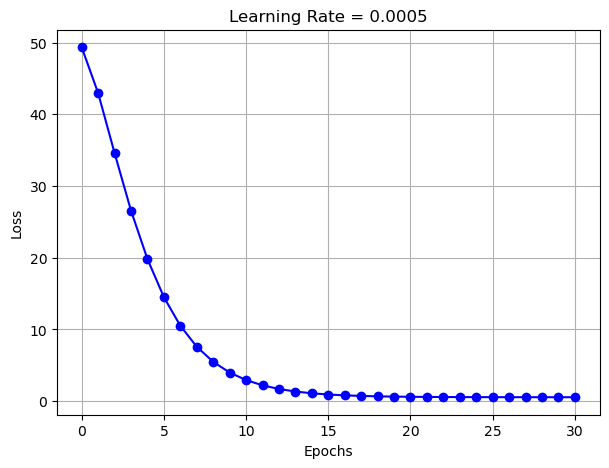

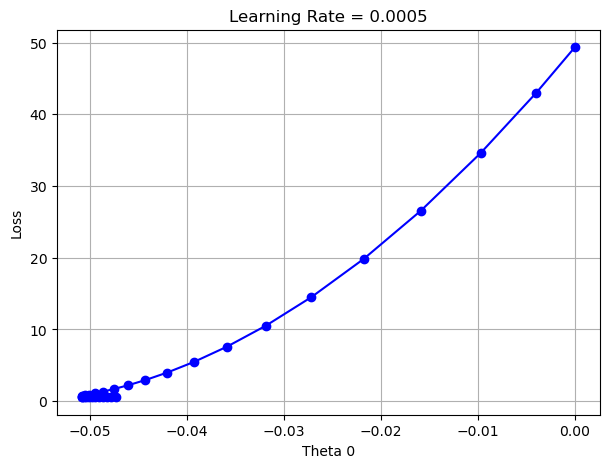

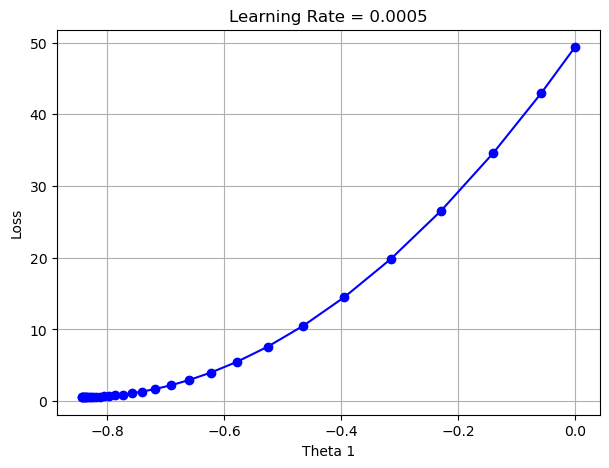

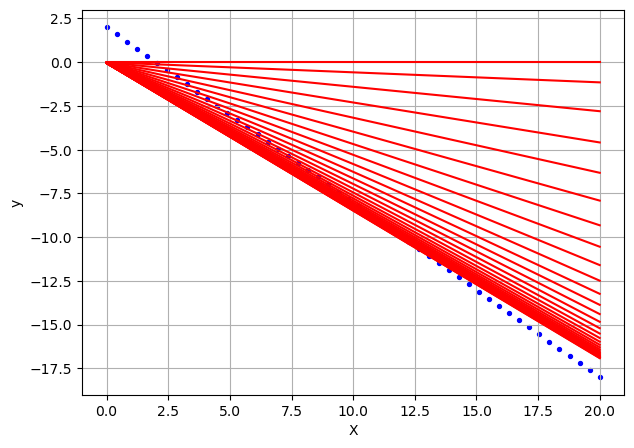

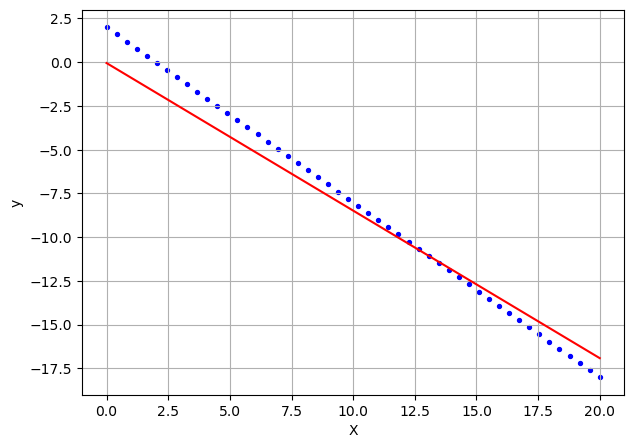

In [21]:
plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [22]:
alpha = 0.0005
gamma = 0.9
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = Momentum_based_gd_single_var(X, y, alpha,gamma,max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.973589591111118


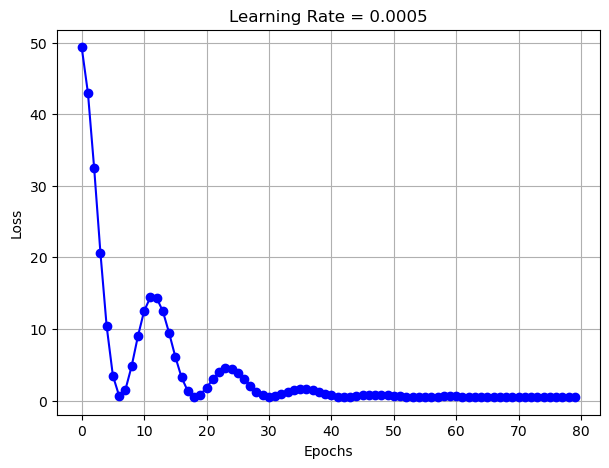

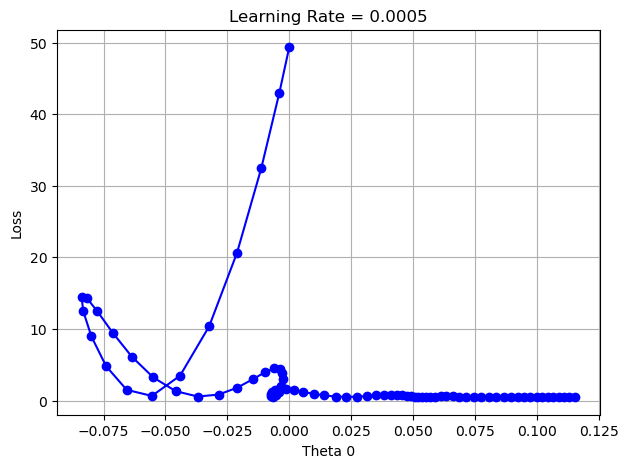

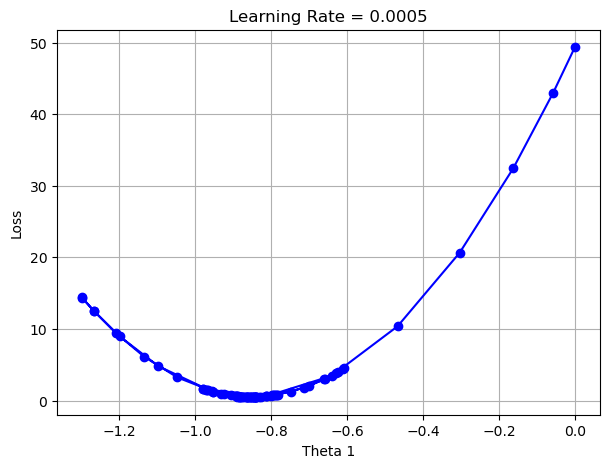

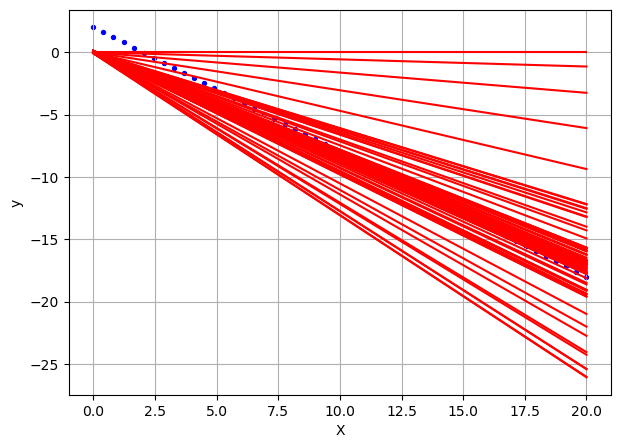

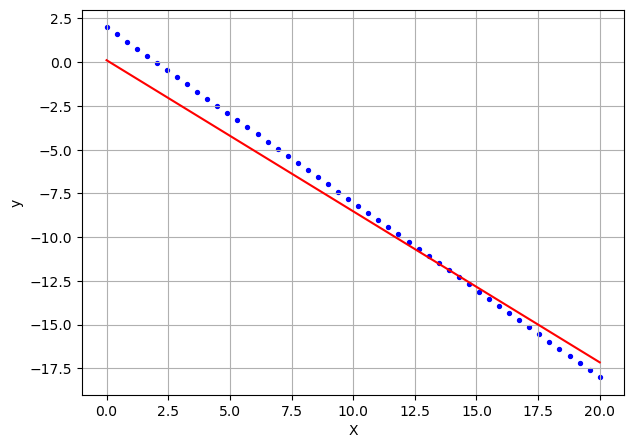

In [25]:
plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [26]:
alpha = 0.0005
gamma = 0.89
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = Momentum_based_gd_single_var(X, y, alpha,gamma,max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

r2_score: 0.972435565060376


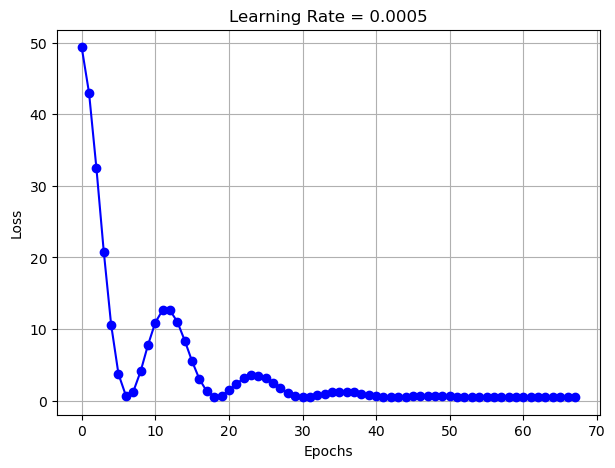

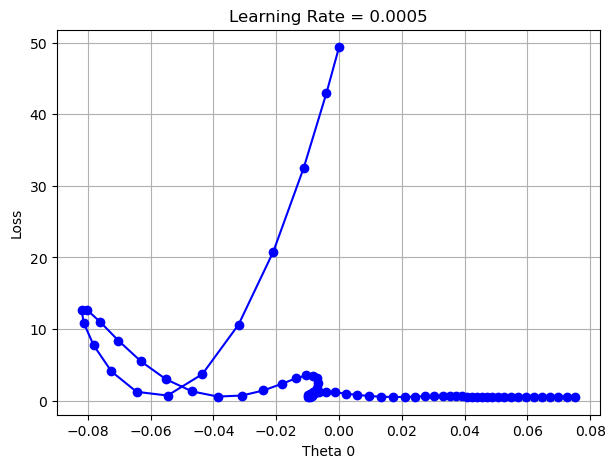

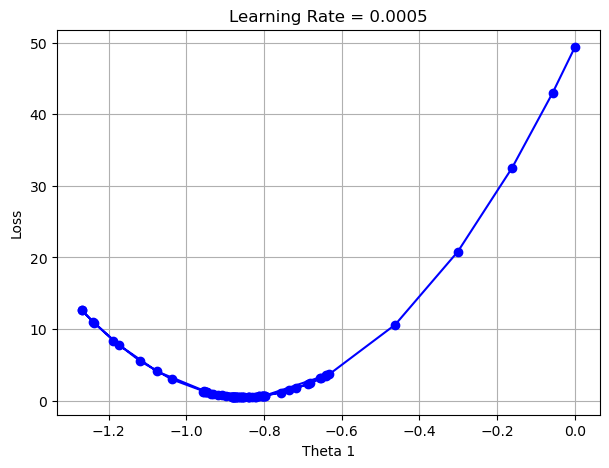

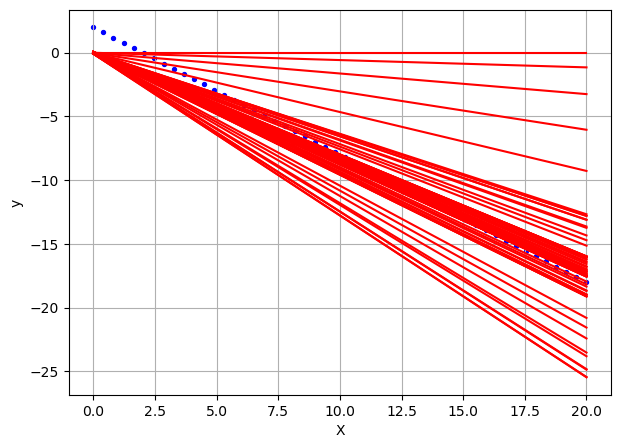

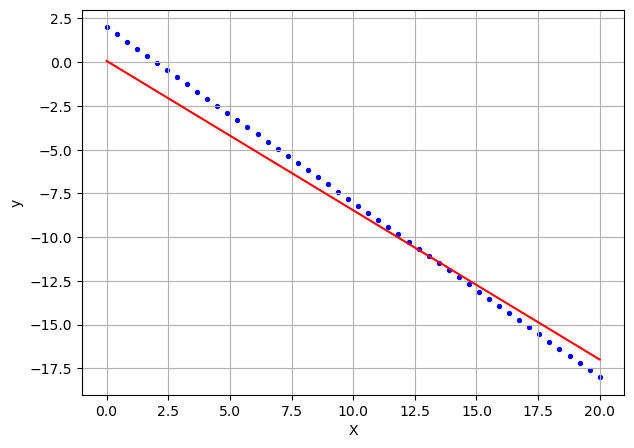

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [ ]:
def NAG_gd_single_var(X, y, alpha, gamma, max_iterations):
    X0 = np.ones(shape=(X.shape[0], 1))
    X_vec = np.concatenate([X0, X.reshape(X.shape[0], -1)], axis=1)  # Concatenate bias term
    
    theta_vec = np.zeros(shape=(X_vec.shape[1], 1))  # Column vector for theta
    theta_temp = theta_vec.copy()
    theta_0_list = []
    theta_1_list = []
    m = len(X)
    J_list = []
    h_x_list = []
    epochs = []
    Vt = np.zeros(shape=(X_vec.shape[1], 1)) 
    
    for i in range(max_iterations):
        epochs.append(i)
        theta_0_list.append(theta_vec[0, 0])
        theta_1_list.append(theta_vec[1, 0])
        
        h_X = X_vec @ theta_vec  # Prediction
        h_x_list.append(h_X)
        e_v = h_X - y.reshape(-1, 1)  # Convert y to column vector
        
        j = (np.linalg.norm(e_v) ** 2) / (2 * m)  # Compute cost
        J_list.append(j)  # Store cost values
        
        gradient_vec = (1 / m) * (X_vec.T @ e_v)  # Compute gradient
        gradient_norm = np.linalg.norm(gradient_vec, 2)
        
        # Check convergence
        if i > 1 and (gradient_norm < 0.001 or abs(J_list[-1] - J_list[-2]) < 0.001):
                    theta_0_opt = theta_vec[0,0]
                    theta_1_opt = theta_vec[1,0]
                    break
                
        theta_temp = theta_vec - gamma*Vt  # Update theta lookahead
        h_lookahead = X_vec @ theta_temp  # lookahead prediction
        e_v_lookahead = h_lookahead - y.reshape(-1, 1)  # lookahead error vector
        
        gradient_temp = (1 / m) * (X_vec.T @ e_v_lookahead)
        Vt = gamma * Vt + alpha * gradient_temp
        theta_vec = theta_vec - Vt
        
         # Update velocity
        
        print(f"*************** Iteration {i} ***************\n\n")
        print("h(x):\n",h_X.reshape(1,-1))
        print("Error Vector:\n", e_v.reshape(1,-1))
        print("\nj =",j)
        print("\nGradient Vector:\n", gradient_vec)
        print("\nGradient Vector Norm:\n",np.linalg.norm(gradient_vec,2))
        print("\ntheta_0_new:",theta_vec[0,0])
        print("theta_1_new:",theta_vec[1,0])
        
        
        
    print("*************** Training Report ***************\n\n")
    print(f"Gradient descent converged after {epochs[-1]} epochs")
    print("\ntheta_0_opt:",theta_vec[0,0])
    print("theta_1_opt:",theta_vec[1,0])
    print("Error Vector:\n", e_v.reshape(1,-1))
    print("\nCost =", j)
    print("h(x) = y_predict:\n",h_X.reshape(1,-1))
    print("y_actual:\n",y)

    return (epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt)         



##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [7]:
alpha = 0.0005
gamma = 0.9
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = NAG_gd_single_var(X, y, alpha,gamma,max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.971103130756324


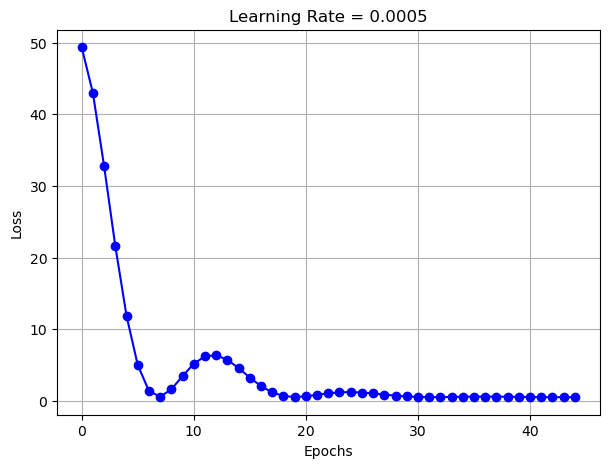

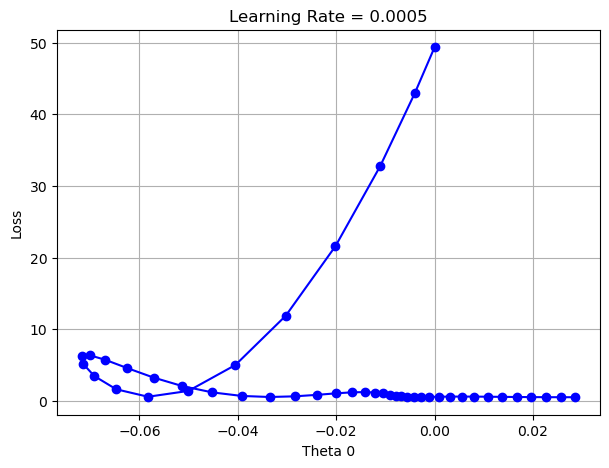

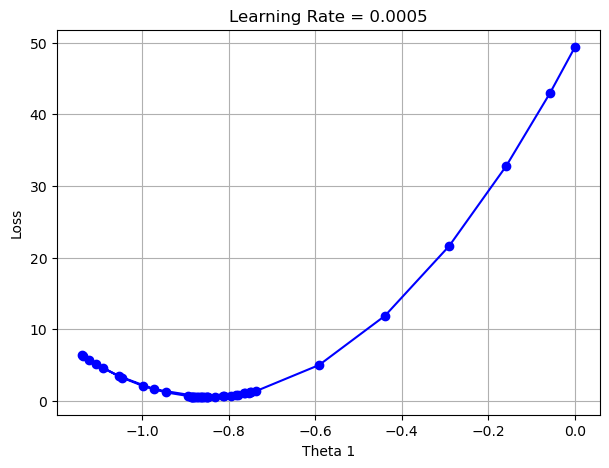

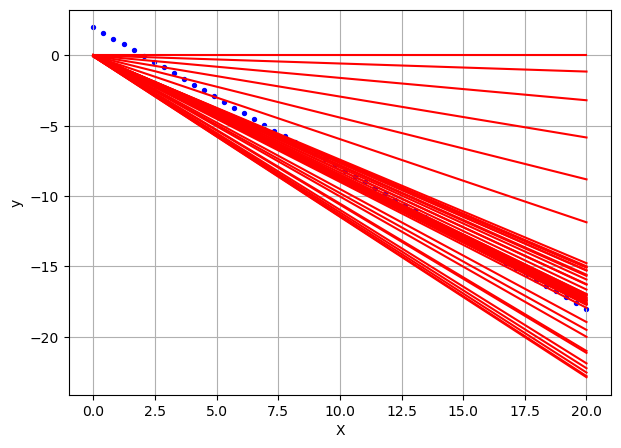

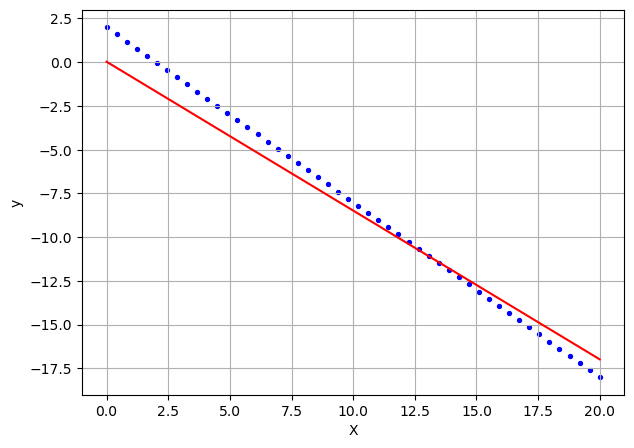

In [12]:
plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [13]:
alpha = 0.0005
gamma = 0.89
max_iterations = 300
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = NAG_gd_single_var(X, y, alpha,gamma,max_iterations)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
   0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
   2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
   5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
   7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
  10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
  12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
  15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
  17.59183673 18.        ]]

j = 49.346938775510196

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9699718983158406


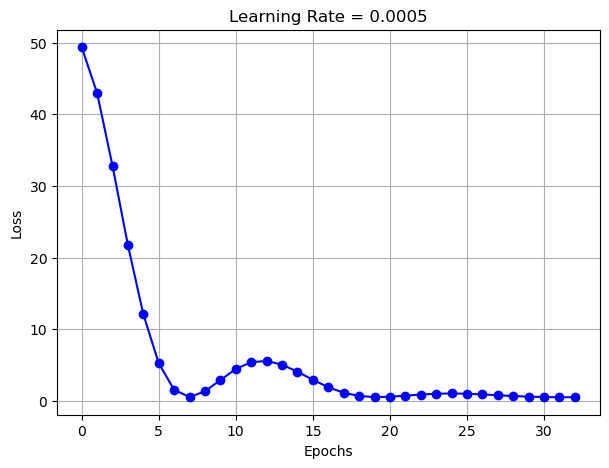

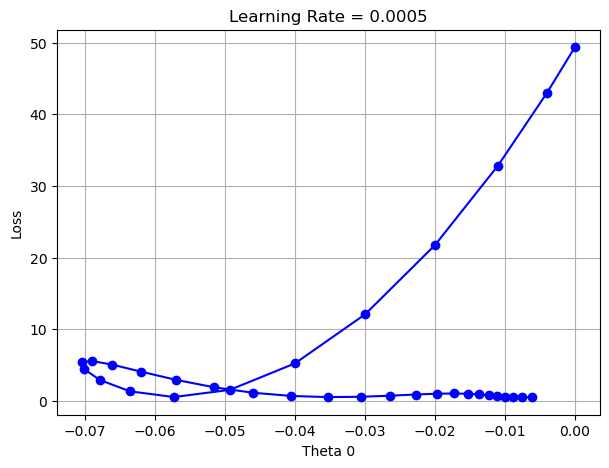

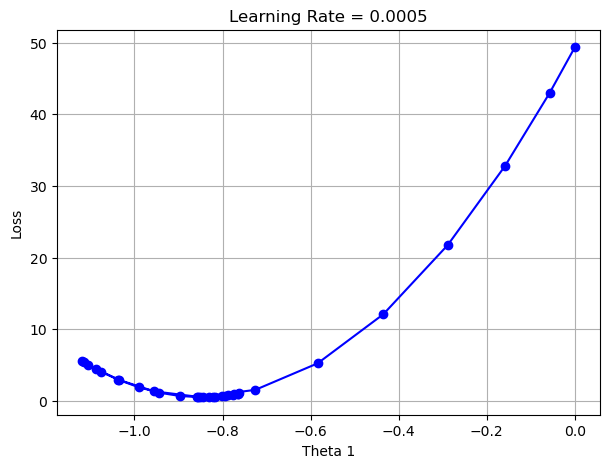

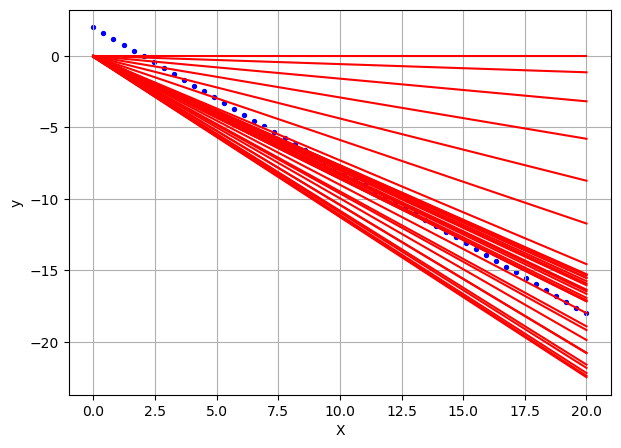

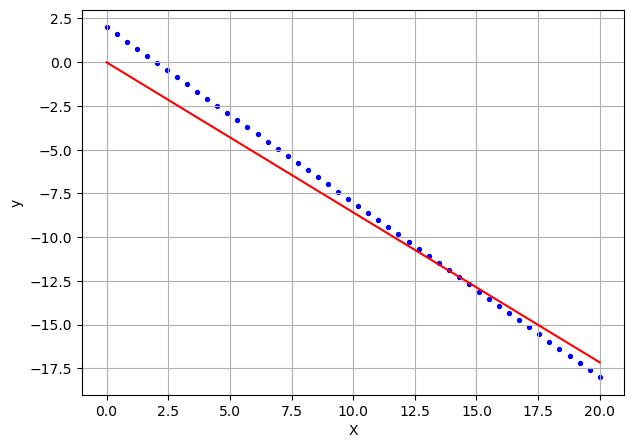

In [15]:
plot_epochs_vs_loss(epochs,J_list,alpha)
plot_theta0_vs_loss(theta_0_list,J_list,alpha)
plot_theta1_vs_loss(theta_1_list,J_list,alpha)
plot_prediction_lines(X,y,h_x_list)
plot_final_prediction_line(X,y,h_x_list[-1])